# Colorstream
### Processing: filter example

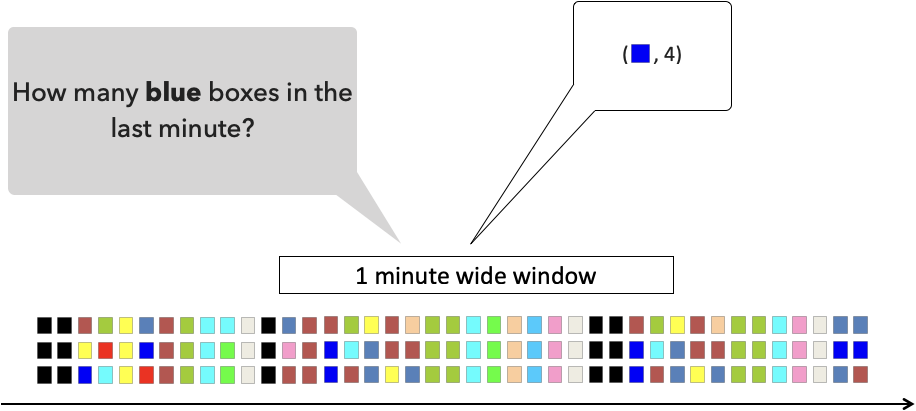

In [1]:
from IPython.display import Image
Image(filename="../images/colorstream.png")

### Inspect the sources

- a description of the stream is available at [http://colorstream:8080/colors](http://colorstream:8080/colors)
- the stream can be consumed via websocket at [ws://colorstream:5555](ws://colorstream:5555)

### Import rsplib and initialize the RSPEngine

In [2]:
from rsplib import RSPEngine

In [3]:
jasper = RSPEngine("http://jasper:8181/jasper")

In [4]:
jasper.streams()

[]

### Define the query, specifing the query id, the t-box and the body of the query

In [5]:
qid  = "bluecount"

In [6]:
tbox = "https://linkeddata.stream/ontologies/colors.owl"

In [8]:
body ="""
        PREFIX colors: <http://www.streamreasoning.org/ontologies/2018/9/colors#>
        SELECT (COUNT(?blue) as ?blueCount)
        FROM NAMED WINDOW <colorwindow> ON <http://colorstream:8080/colors> [RANGE PT60S STEP PT60S]
        WHERE {
            WINDOW <colorwindow> { 
                ?blue a colors:Blue .
            }
        }
      """

In [9]:
bluecount_query = jasper.create(qid, body, tbox)

In [10]:
bluecount_query.sources()

[GET http://colorstream:8080/colors]

### The stream has no endpoint

In [11]:
bluecount_query.stream().endpoints()

[]

### Create a stream endpoint

In [12]:
response = jasper.expose(qid, 'HTTP', retention=5)

In [13]:
jasper.streams()

[http://jasper:8181/jasper/streams/bluecount, http://colorstream:8080/colors]

### Inspect and call the response endpoints

In [14]:
response.endpoints()

[GET http://jasper:8182/jasper/streams/bluecount/observers/1792628596]

In [50]:
output = response.endpoints()[0].call()
output

[
    {
        "eventTime": 1592764056221,
        "blueCount": 1,
        "processingTime": 1592764056221
    },
    {
        "eventTime": 1592764056225,
        "blueCount": 0,
        "processingTime": 1592764056226
    },
    {
        "eventTime": 1592764056230,
        "blueCount": 0,
        "processingTime": 1592764056232
    },
    {
        "eventTime": 1592764056233,
        "blueCount": 0,
        "processingTime": 1592764056236
    },
    {
        "eventTime": 1592764056244,
        "blueCount": 1,
        "processingTime": 1592764056244
    }
]

In [15]:
output_df = output.flatten().dataframe()

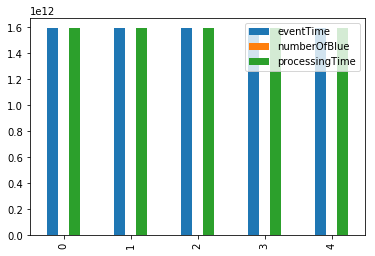

In [18]:
%matplotlib inline
output_df.plot(kind='bar');

In [19]:
jasper.delete(qid)

{
    "@id": "queries/bluecount",
    "@type": "vprov:Task",
    "prov:generated": {
        "@id": "streams/bluecount"
    },
    "prov:uses": {
        "@id": "http://colorstream:8080/colors"
    },
    "@context": {
        "@base": "http://jasper:8181/jasper/",
        "rdf": "http://www.w3.org/1999/02/22-rdf-syntax-ns#",
        "vsd": "http://w3id.org/rsp/vocals-sd#",
        "vocals": "http://w3id.org/rsp/vocals#",
        "xsd": "http://www.w3.org/2001/XMLSchema#",
        "format": "http://www.w3.org/ns/formats/",
        "rdfs": "http://www.w3.org/2000/01/rdf-schema#",
        "vprov": "http://w3id.org/rsp/vocals-prov#",
        "dcat": "http://www.w3.org/ns/dcat#",
        "prov": "http://www.w3.org/ns/prov#"
    }
}